In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(115,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dental/train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dental/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 1091 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
model.fit(training_set, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 5s 115ms/step - loss: 8.6380 - accuracy: 0.4400
Epoch 2/10
20/20 [==============================] - 2s 89ms/step - loss: 8.0210 - accuracy: 0.4800
Epoch 3/10
20/20 [==============================] - 2s 115ms/step - loss: 8.0210 - accuracy: 0.4800
Epoch 4/10
20/20 [==============================] - 1s 50ms/step - loss: 7.9951 - accuracy: 0.4817
Epoch 5/10
20/20 [==============================] - 2s 111ms/step - loss: 7.3491 - accuracy: 0.5236
Epoch 6/10
20/20 [==============================] - 1s 55ms/step - loss: 8.0981 - accuracy: 0.4750
Epoch 7/10
20/20 [==============================] - 1s 53ms/step - loss: 7.8667 - accuracy: 0.4900
Epoch 8/10
20/20 [==============================] - 1s 52ms/step - loss: 8.0981 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 1s 54ms/step - loss: 7.2497 - accuracy: 0.5300
Epoch 10/10
20/20 [==============================] - 1s 69ms/step - loss: 8.4837 - accuracy: 0.4500


In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

8/8 - 1s - loss: 8.0130 - accuracy: 0.4805 - 657ms/epoch - 82ms/step



Test Loss: 	 8.012960433959961 

Test Accuracy: 	 0.48051947355270386 



In [ ]:
import tensorflow as tf

In [ ]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(64,64,3),
                                                  pooling = 'avg',classes=2,
                                                  weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

In [ ]:
resnet_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dental/train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dental/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 1091 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
resnet_model.fit(training_set, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 6s 51ms/step - loss: 0.6956 - accuracy: 0.5200
Epoch 2/10
20/20 [==============================] - 1s 62ms/step - loss: 0.6979 - accuracy: 0.5050
Epoch 3/10
20/20 [==============================] - 2s 75ms/step - loss: 0.6938 - accuracy: 0.5300
Epoch 4/10
20/20 [==============================] - 1s 57ms/step - loss: 0.7051 - accuracy: 0.4750
Epoch 5/10
20/20 [==============================] - 1s 57ms/step - loss: 0.7040 - accuracy: 0.4900
Epoch 6/10
20/20 [==============================] - 1s 57ms/step - loss: 0.6938 - accuracy: 0.5200
Epoch 7/10
20/20 [==============================] - 1s 57ms/step - loss: 0.7062 - accuracy: 0.4800
Epoch 8/10
20/20 [==============================] - 1s 57ms/step - loss: 0.6859 - accuracy: 0.5500
Epoch 9/10
20/20 [==============================] - 1s 59ms/step - loss: 0.6975 - accuracy: 0.5050
Epoch 10/10
20/20 [==============================] - 1s 60ms/step - loss: 0.6996 - accuracy: 0.4850


In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

8/8 - 1s - loss: 0.7076 - accuracy: 0.5195 - 1s/epoch - 178ms/step



Test Loss: 	 0.7075685262680054 

Test Accuracy: 	 0.5194805264472961 



Test accuracy increased using resnet model

In [ ]:
#VGG model
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights='imagenet',include_top=False, input_shape=(64,64,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(1,activation='sigmoid'))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dental/train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dental/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 1091 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
vgg_model.fit(training_set, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 4s 46ms/step - loss: 0.7611 - accuracy: 0.5100
Epoch 2/10
20/20 [==============================] - 1s 50ms/step - loss: 0.7744 - accuracy: 0.4650
Epoch 3/10
20/20 [==============================] - 1s 51ms/step - loss: 0.7455 - accuracy: 0.5100
Epoch 4/10
20/20 [==============================] - 1s 52ms/step - loss: 0.7313 - accuracy: 0.4900
Epoch 5/10
20/20 [==============================] - 2s 77ms/step - loss: 0.7286 - accuracy: 0.4921
Epoch 6/10
20/20 [==============================] - 1s 73ms/step - loss: 0.7268 - accuracy: 0.5050
Epoch 7/10
20/20 [==============================] - 1s 53ms/step - loss: 0.7140 - accuracy: 0.5000
Epoch 8/10
20/20 [==============================] - 1s 54ms/step - loss: 0.7191 - accuracy: 0.4750
Epoch 9/10
20/20 [==============================] - 1s 52ms/step - loss: 0.7260 - accuracy: 0.4800
Epoch 10/10
20/20 [==============================] - 1s 66ms/step - loss: 0.7014 - accuracy: 0.5450


In [ ]:
test_loss, test_acc = vgg_model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

8/8 - 2s - loss: 0.6910 - accuracy: 0.5584 - 2s/epoch - 218ms/step



Test Loss: 	 0.6909931302070618 

Test Accuracy: 	 0.5584415793418884 



In [ ]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e6f8661894b04ef886ae10ad883c8789ea769a9b1a0f1823c6cf252451a89361
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
#print(type(test_set))
tmp1, tmp2 = next(test_set)
background = shap.utils.sample(tmp1,5)
explainer = shap.DeepExplainer(model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_index = np.random.randint(0, background.shape[0])
sample_image = background[sample_index]

In [ ]:
!pip install lime shap
import shap
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


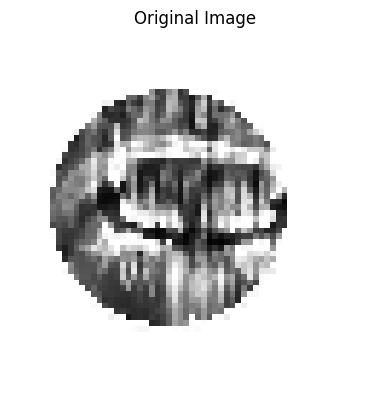

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

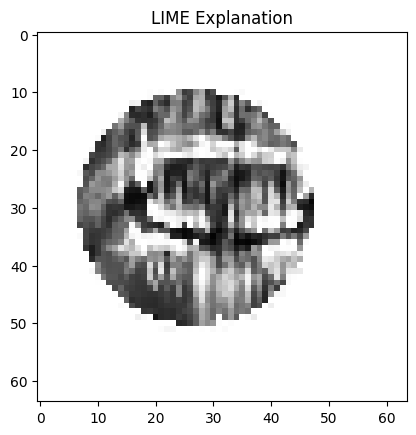

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)

shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

AttributeError: 'LimeImageExplainer' object has no attribute 'shap_values'